# AirStream: analisi della qualità dell'aria

AirStream è un software per l'analisi della qualità dell'aria con riferimento alla città di Catania.
I dati dell'inquinamento vengono acquisiti in streaming da una sorgente esterna vengono elaborati in tempo reale con lo scopo di: 
- Monitorare l'andamento della qualità dell'aria e le principali condizioni atmosferiche
- Predire la qualità dell'aria per l'ora successiva

La qualità dell'aria è rappresentata da un indice numerico intero (aqi) che varia da 1 a 5:
- 1 → Altà qualità
- 5 → Elevato grado di inquinamento

<p align="center">
  <img src="images/quality_indicator.jpg" width="600">
</p>

# Infrastruttura e flusso dei dati
<center>
<img src="images/infrastructure_schema.png" width="900">
</center>

# Docker

Docker è una piattaforma che permette di creare, distribuire ed eseguire applicazioni in **container**.  
Un container è un ambiente isolato e leggero che contiene tutto ciò che serve per eseguire un software (codice, librerie, configurazioni).  

**Vantaggi principali**  
- **Portabilità**: un container gira allo stesso modo su qualsiasi macchina (Windows, Linux, Mac, server cloud).  
- **Isolamento**: ogni componente del progetto vive nel suo container, senza conflitti di librerie o versioni.  
- **Scalabilità**: è semplice avviare più istanze dello stesso container per gestire carichi maggiori.  
- **Velocità**: i container si avviano molto più rapidamente rispetto a una macchina virtuale.  

**Utilizzo nel progetto**  
Docker è stato usato per:  
- Avviare i vari servizi (Logstash, Kafka, Spark, Elasticsearch, Kibana) in modo coordinato tramite **Docker Compose**.  
- Garantire che l’infrastruttura sia replicabile su qualsiasi macchina, senza dover riconfigurare manualmente ogni software.  

# OpenWeatherMap 

È una sorgente dati esterna che fornisce informazioni su condizioni climatiche e qualità dell’aria tramite delle API REST.

**Utilizzo nel progetto**  
- Punto di partenza della pipeline: da qui vengono acquisiti i dati ambientali e meteorologici che alimentano tutto il flusso successivo.
- Estrazione dei dati per costruire i dataset di training e validation

## Dataset

In [12]:
import pandas as pd

df = pd.read_csv("./spark/workspace/dataset/dataset_training.csv", sep = ";")

df.info()
df.describe()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36935 entries, 0 to 36934
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   datetime     36935 non-null  object 
 1   aqi          36935 non-null  int64  
 2   co           36935 non-null  float64
 3   no           36935 non-null  float64
 4   no2          36935 non-null  float64
 5   o3           36935 non-null  float64
 6   so2          36935 non-null  float64
 7   pm2_5        36935 non-null  float64
 8   pm10         36935 non-null  float64
 9   nh3          36935 non-null  float64
 10  next_aqi     36935 non-null  float64
 11  temperature  36935 non-null  float64
 12  wind_speed   36935 non-null  float64
 13  humidity     36935 non-null  int64  
dtypes: float64(11), int64(2), object(1)
memory usage: 3.9+ MB


,aqi,co,no,no2,o3,so2,pm2_5,pm10,nh3,next_aqi,temperature,wind_speed,humidity
count,36935.000000,36935.000000,36935.000000,36935.000000,36935.000000,36935.000000,36935.000000,36935.000000,36935.000000,36935.000000,36935.000000,36935.000000,36935.000000
mean,3.035278,355.915247,0.931765,10.651460,63.275624,60.052479,39.038992,47.874948,0.494625,3.035197,18.628374,9.994247,66.429403
std,1.325907,198.365419,3.627724,74.745992,61.791752,54.626923,47.799557,79.235003,0.912844,1.325878,7.064819,6.718221,15.794916
min,1.000000,150.200000,0.000000,-9999.000000,-9999.000000,1.970000,0.500000,-9999.000000,0.000000,1.000000,1.100000,0.000000,7.000000
25%,2.000000,230.310000,0.000000,2.250000,38.620000,17.640000,8.920000,11.360000,0.000000,2.000000,12.900000,5.000000,56.000000
50%,3.000000,283.720000,0.080000,6.080000,65.090000,43.870000,23.630000,28.950000,0.000000,3.000000,17.600000,8.000000,69.000000
75%,4.000000,403.880000,0.330000,15.590000,87.260000,85.830000,50.820000,62.235000,0.650000,4.000000,24.100000,13.800000,79.000000
max,5.000000,2002.720000,68.840000,91.850000,283.240000,503.540000,507.000000,955.560000,18.240000,5.000000,45.200000,51.700000,100.000000


In [7]:
df.head()



,datetime,aqi,co,no,no2,o3,so2,pm2_5,pm10,nh3,next_aqi,temperature,wind_speed,humidity
0,2020-11-25 02:00:00,5,694.28,13.08,17.99,0.11,30.52,64.53,65.13,0.0,5.0,14.2,6.5,93
1,2020-11-25 03:00:00,5,607.49,8.94,16.28,0.23,29.56,64.32,64.84,0.0,5.0,14.1,6.6,92
2,2020-11-25 04:00:00,5,574.11,7.15,15.59,0.31,32.42,65.15,65.64,0.0,5.0,14.0,6.8,93
3,2020-11-25 05:00:00,5,554.09,5.81,15.59,0.56,35.29,66.35,66.84,0.0,5.0,13.5,6.5,93
4,2020-11-25 06:00:00,5,560.76,5.87,15.25,0.54,25.27,67.44,67.95,0.0,5.0,13.3,5.5,92


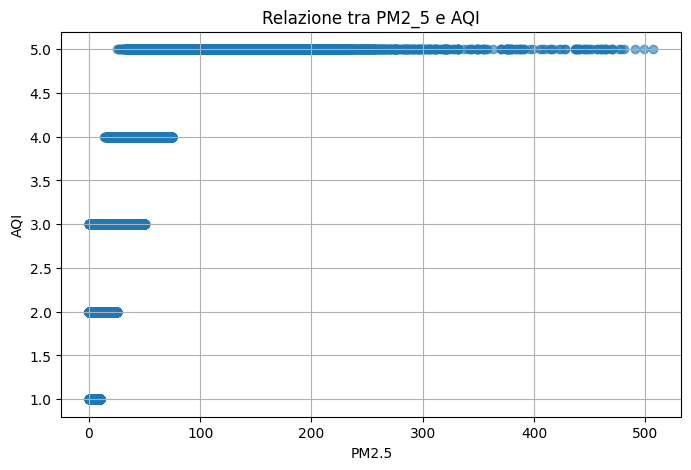

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.scatter(df['pm2_5'], df['aqi'], alpha=0.6)
plt.xlabel('PM2.5')
plt.ylabel('AQI')
plt.title('Relazione tra PM2_5 e AQI')
plt.grid(True)
plt.show()


# Logstash

Logstash è un tool di data ingestion che raccoglie, trasforma e invia dati verso sistemi di destinazione.  

**Utilizzo nel progetto**  
Nel progetto viene usato per fare polling periodico ogni minuto sugli endpoint di OpenWeatherMap, prelevando sia i dati sulla qualità dell’aria che quelli meteorologici. I dati così raccolti vengono inviati in due topic distinti di Kafka, mantenendo separati i flussi di informazioni.


# Kafka

Kafka è una piattaforma di streaming e messaggistica che funge da buffer tra le sorgenti e i sistemi di elaborazione.
Permette di gestire grandi volumi di dati in tempo reale, garantendo affidabilità e scalabilità.  

**Utilizzo nel progetto**  
Kafka riceve i dati da Logstash e li rende disponibili a Spark per l’elaborazione

# Spark

Apache Spark è un motore distribuito per l’elaborazione di grandi volumi di dati.

- Lettura dei dati da kafka

- Conversione dei messaggi in DataFrame

- Rimozione dei duplicati,

- Applicazione di un modello di Machine Learning (Random Forest) per generare predizioni sulla qualità dell’aria.


## Modello

Dato il contesto applicativo del software, il task di machine learning è la classificazione multiclasse in cui le label y ∈ {1,2,3,4,5}

Il risultati migliori sul dataset di validation sono stati riscontrati con il modello Random Forest:

  <!-- Tabella -->
  <table style="border: 1px solid black; border-collapse: collapse;">
    <tr>
      <th style="border: 1px solid black; padding: 5px;">Dataset</th>
      <th style="border: 1px solid black; padding: 5px;">Accuracy</th>
      <th style="border: 1px solid black; padding: 5px;">F1 Score</th>
    </tr>
    <tr>
      <td style="border: 1px solid black; padding: 5px;">Training</td>
      <td style="border: 1px solid black; padding: 5px;">0.85</td>
      <td style="border: 1px solid black; padding: 5px;">0.85</td>
    </tr>
    <tr>
      <td style="border: 1px solid black; padding: 5px;">Validation</td>
      <td style="border: 1px solid black; padding: 5px;">0.92</td>
      <td style="border: 1px solid black; padding: 5px;">0.92</td>
    </tr>
  </table>
  
  <!-- Immagine -->
  <center>
  <img src="images/random_forest.png" style="width:300px; height:auto; border:1px solid black;">
  


# Elasticsearch

Elasticsearch è un motore di ricerca e analisi distribuito, ottimizzato per lavorare con grandi quantità di dati in real-time. Grazie alle sue capacità di indicizzazione, si possono effettuare delle query sui dati in modo molto efficiente.  

**Utilizzo nel progetto**   
- Database di destinazione per memorizzare i risultati elaborati da Spark. 

# Kibana

Kibana è uno strumento di visualizzazione dei dati perfettamente integrato con Elasticsearch.  

**Utilizzo nel progetto**  
- Costruire dashboard interattive che mostrano in tempo reale l’andamento della qualità dell’aria e delle condizioni atmosferiche. Le visualizzazioni includono heatmap, istogrammi, mappe e metriche che permettono di interpretare i dati della pipeline.

Un importante punto a favore di Kibana è che è perfettamente integrabile con Elasticsearch: insieme costituiscono il cuore del cosiddetto **ELK Stack** (Elasticsearch, Logstash, Kibana), una delle soluzioni più consolidate per la gestione dei dati in temppo reale.  

Come si dice: *“squadra che vince non si cambia”*

<p align="center">
  <img src="images/example_dashboard.png" width="800">
</p>

# Applicazioni pratiche

- Supporto decisionale per le amministrazioni locali
- Allerta per i cittadini
- Integrazione in app di smart city
- Analisi ambientali e ricerca

# Sviluppi futuri
- Monitoraggio di più città
- Modelli di machine learning più avanzati (RNN, LSTM, Transformers)
- Integrare più sorgenti
- Analisi predittiva a lungo termine

# Bibliografia e Approfondimenti

- **OpenWeatherMap API**  
  [https://openweathermap.org/api](https://openweathermap.org/api)

- **Logstash**  
  [https://www.elastic.co/logstash](https://www.elastic.co/logstash)

- **Apache Kafka**  
  [https://kafka.apache.org/](https://kafka.apache.org/)

- **Apache Spark**  
  [https://spark.apache.org/docs/latest/](https://spark.apache.org/docs/latest/)

- **Elasticsearch**  
  [https://www.elastic.co/elasticsearch](https://www.elastic.co/elasticsearch)

- **Kibana**  
  [https://www.elastic.co/kibana](https://www.elastic.co/kibana)

- **ELK Stack**
  [https://www.elastic.co/what-is/elk-stack](https://www.elastic.co/what-is/elk-stack)

- **Random Forest**  
  [https://scikit-learn.org/stable/modules/ensemble.html#random-forests](https://scikit-learn.org/stable/modules/ensemble.html#random-forests)
  
- **Docker**  
  [https://www.docker.com/](https://www.docker.com/)
